In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Fetch the dataset with id=336 (Chronic Kidney Disease)
ckd_dataset = fetch_ucirepo(id=336)

# Convert to a pandas DataFrame
df_ckd = ckd_dataset.data.original

# Save the DataFrame to a CSV file
df_ckd.to_csv('ckd_dataset.csv', index=False)

print("Dataset saved as ckd_dataset.csv")

Dataset saved as ckd_dataset.csv


# Task
Perform exploratory data analysis (EDA) on the "ckd_dataset.csv" dataset.

## Load the dataset

### Subtask:
Load the `ckd_dataset.csv` file into a pandas DataFrame.


**Reasoning**:
Load the `ckd_dataset.csv` file into a pandas DataFrame as requested.



In [6]:
df_ckd = pd.read_csv('ckd_dataset.csv')

## Initial data inspection

### Subtask:
Display the first few rows, check the data types of each column, and get a summary of the DataFrame (including the number of non-null values).


**Reasoning**:
Display the first few rows of the DataFrame and check the data types and non-null counts.



In [7]:
display(df_ckd.head())
df_ckd.info()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

## Handle missing values

### Subtask:
Identify and decide on a strategy for handling missing values (e.g., imputation, removal).


**Reasoning**:
Calculate and display the number of missing values per column to understand the extent of missing data.



In [8]:
missing_values = df_ckd.isnull().sum()
display("Number of missing values per column:")
display(missing_values)

'Number of missing values per column:'

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


## Descriptive statistics

### Subtask:
Calculate descriptive statistics for numerical columns (mean, median, standard deviation, etc.) and frequency counts for categorical columns.


**Reasoning**:
Select numerical and categorical columns and calculate descriptive statistics for numerical columns and frequency counts for categorical columns.



In [9]:
# Select numerical columns
numerical_cols = df_ckd.select_dtypes(include=np.number).columns

# Calculate descriptive statistics for numerical columns
display("Descriptive statistics for numerical columns:")
display(df_ckd[numerical_cols].describe())

# Select categorical columns
# Identify categorical columns by excluding numerical ones and checking unique values
categorical_cols = df_ckd.select_dtypes(include='object').columns

display("\nFrequency counts for categorical columns:")
# Calculate frequency counts for categorical columns
for col in categorical_cols:
    display(f"\nFrequency counts for column: {col}")
    display(df_ckd[col].value_counts())

'Descriptive statistics for numerical columns:'

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


'\nFrequency counts for categorical columns:'

'\nFrequency counts for column: rbc'

,count
rbc,
normal,201
abnormal,47


'\nFrequency counts for column: pc'

,count
pc,
normal,259
abnormal,76


'\nFrequency counts for column: pcc'

,count
pcc,
notpresent,354
present,42


'\nFrequency counts for column: ba'

,count
ba,
notpresent,374
present,22


'\nFrequency counts for column: htn'

,count
htn,
no,251
yes,147


'\nFrequency counts for column: dm'

,count
dm,
no,260
yes,137
\tno,1


'\nFrequency counts for column: cad'

,count
cad,
no,364
yes,34


'\nFrequency counts for column: appet'

,count
appet,
good,317
poor,82


'\nFrequency counts for column: pe'

,count
pe,
no,323
yes,76


'\nFrequency counts for column: ane'

,count
ane,
no,339
yes,60


'\nFrequency counts for column: class'

,count
class,
ckd,248
notckd,150
ckd\t,2


## Data visualization

### Subtask:
Create visualizations to understand the distribution of individual features and the relationships between features. This could include histograms, box plots, scatter plots, and bar plots.


**Reasoning**:
Create visualizations to understand the distribution of individual features and the relationships between features, as outlined in the subtask instructions. This includes histograms for numerical columns, box plots for numerical columns, bar plots for categorical columns, scatter plots for relationships between numerical features, and visualizations for relationships between categorical features and the target variable 'class'.



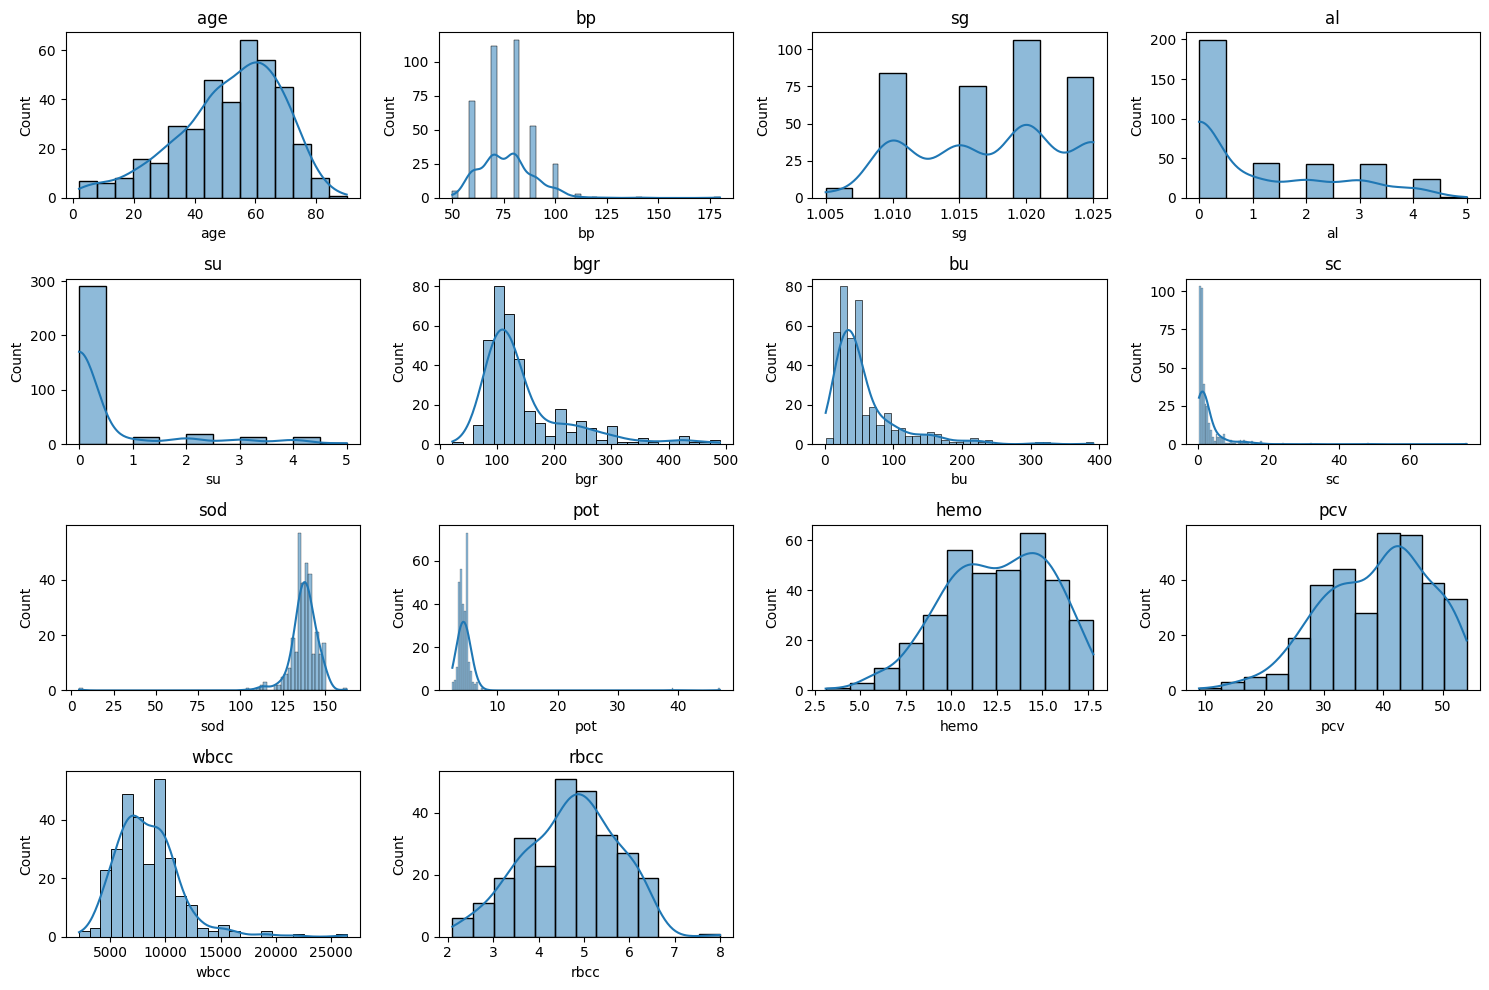

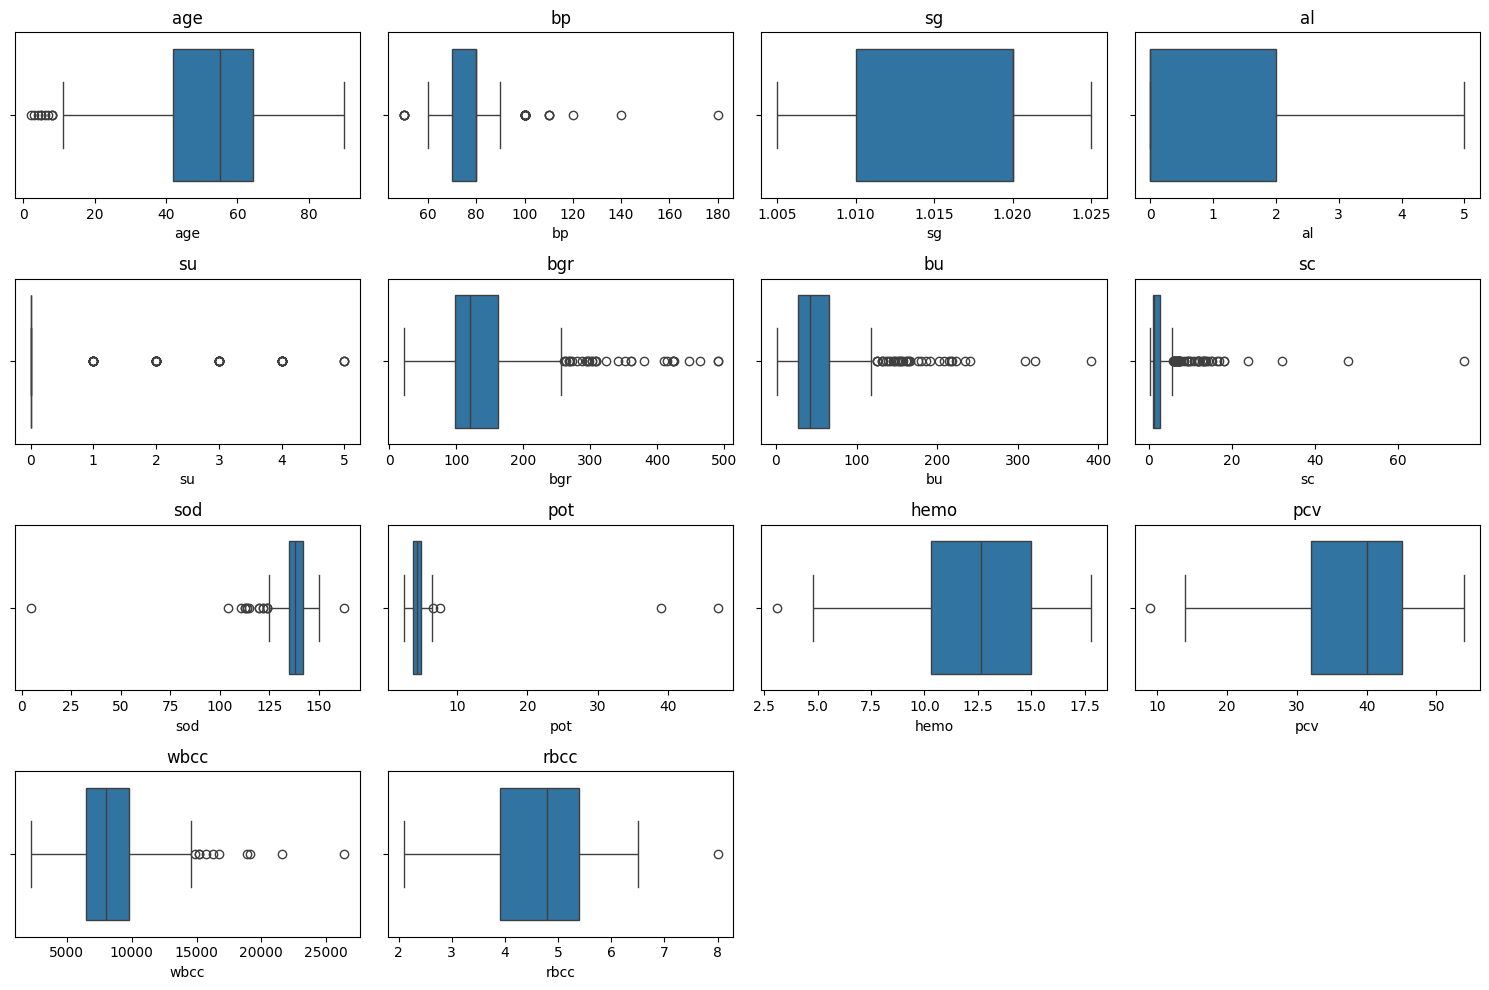

/tmp/ipython-input-21222737.py:28: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


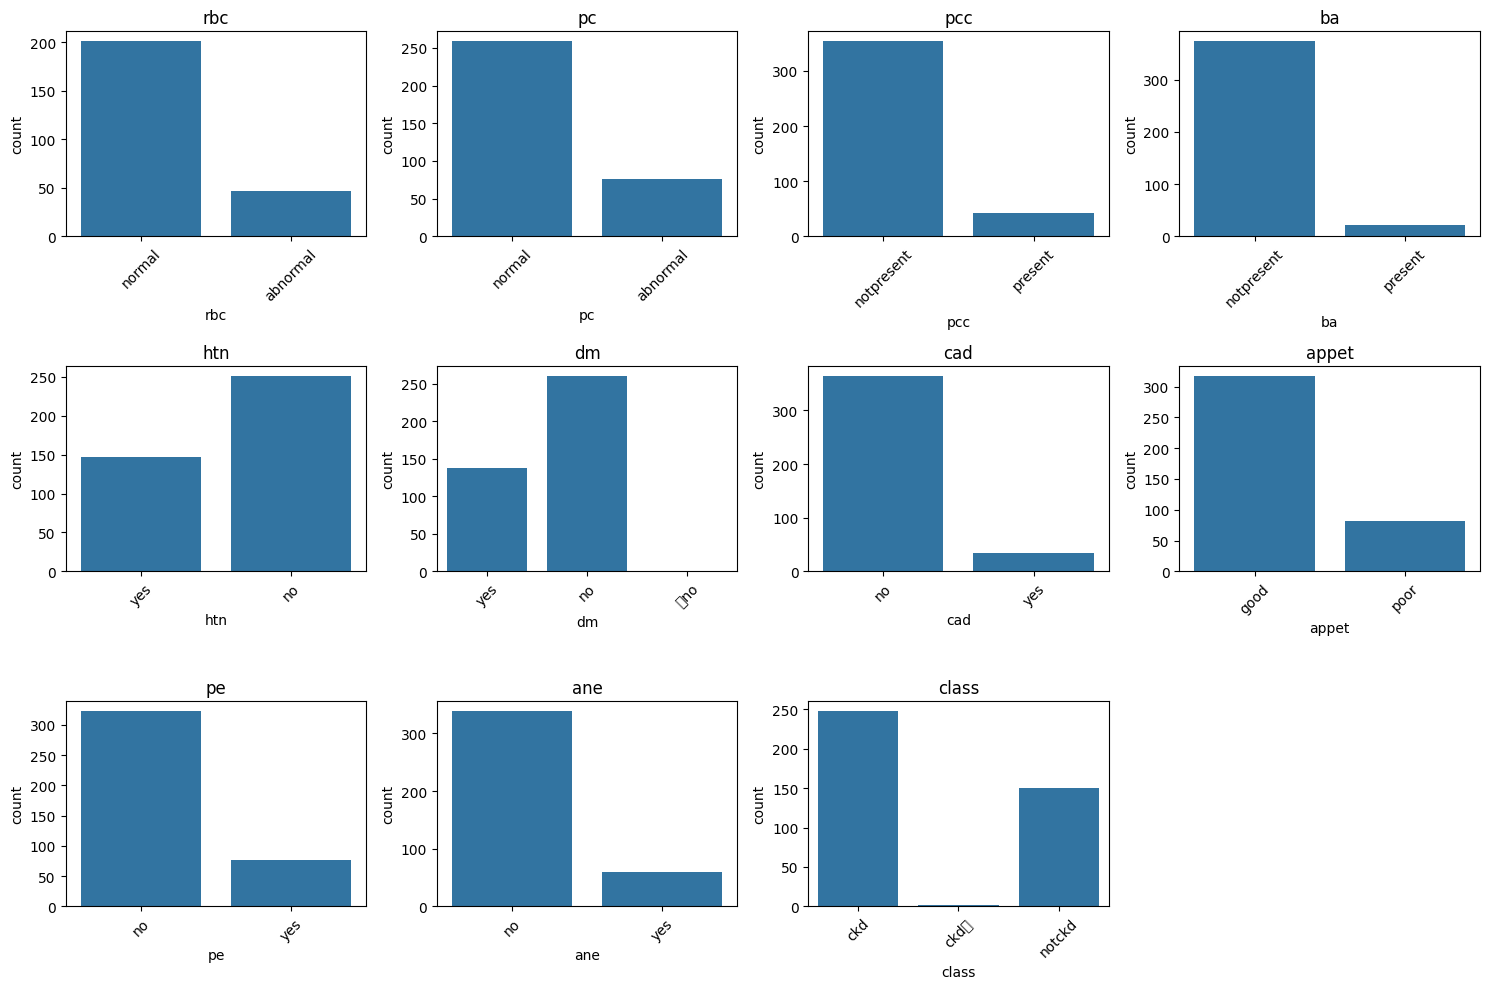

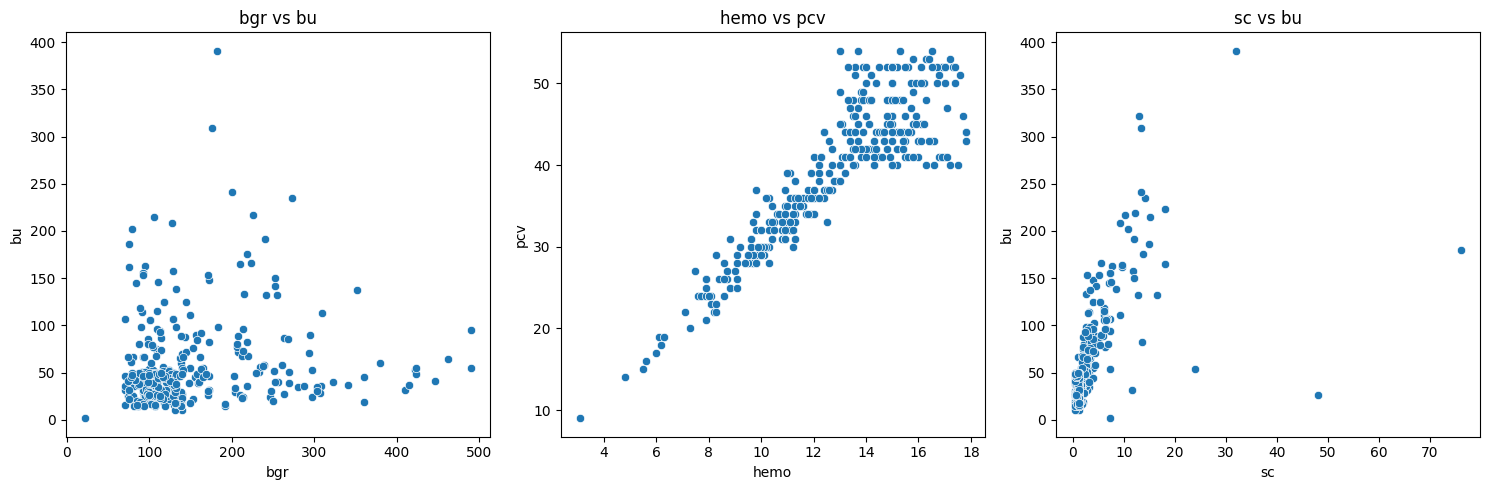

/tmp/ipython-input-21222737.py:52: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


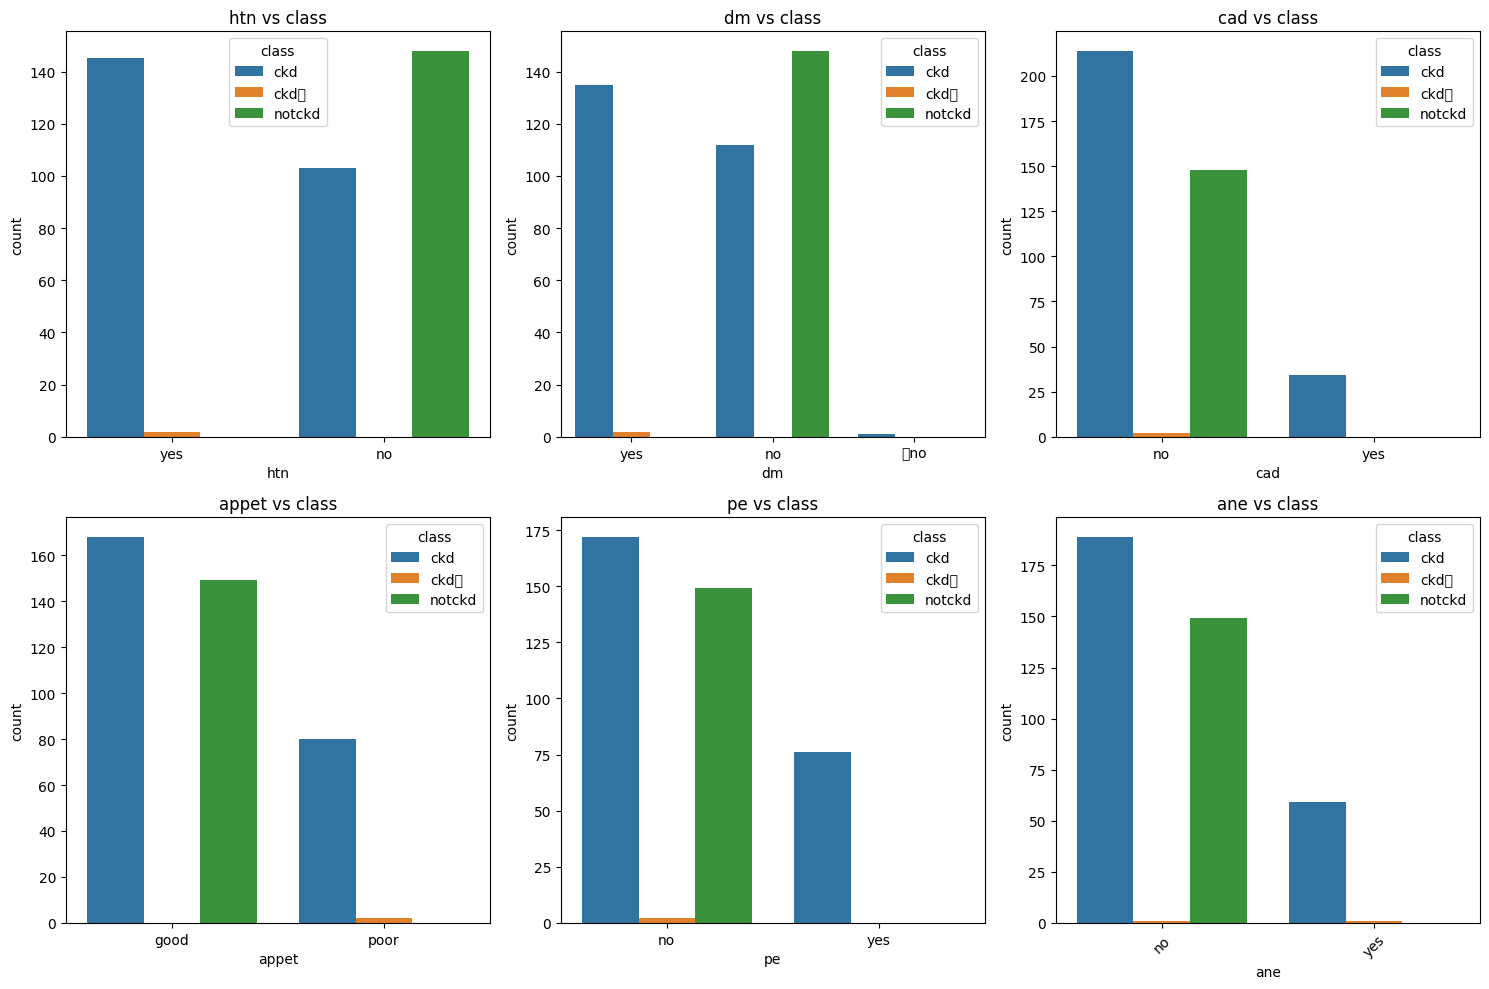

In [10]:
# Step 1: Create histograms for numerical columns
numerical_cols = df_ckd.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_ckd[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Step 2: Generate box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df_ckd[col].dropna())
    plt.title(col)
plt.tight_layout()
plt.show()

# Step 3: Create bar plots or count plots for categorical columns
categorical_cols = df_ckd.select_dtypes(include='object').columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 4, i + 1)
    sns.countplot(x=df_ckd[col].dropna())
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Select a few relevant numerical features and create scatter plots
# Based on potential relationships, let's pick 'bgr' vs 'bu', 'hemo' vs 'pcv', and 'sc' vs 'bu'
selected_numerical_pairs = [('bgr', 'bu'), ('hemo', 'pcv'), ('sc', 'bu')]
plt.figure(figsize=(15, 5))
for i, (col1, col2) in enumerate(selected_numerical_pairs):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df_ckd[col1], y=df_ckd[col2])
    plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()


# Step 5: Create visualizations to explore the relationship between categorical features and the target variable 'class'.
# Let's examine 'htn', 'dm', 'cad', 'appet', 'pe', 'ane' against 'class'
categorical_vs_class_cols = ['htn', 'dm', 'cad', 'appet', 'pe', 'ane']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_vs_class_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df_ckd[col].dropna(), hue=df_ckd['class'].dropna())
    plt.title(f'{col} vs class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Explore the target variable

### Subtask:
Analyze the distribution of the target variable ('class' in this dataset) and its relationship with other features.


**Reasoning**:
Analyze the distribution of the target variable ('class') and its relationship with other features as per the instructions.



"Frequency distribution of the 'class' column:"

,count
class,
ckd,248
notckd,150
ckd\t,2


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


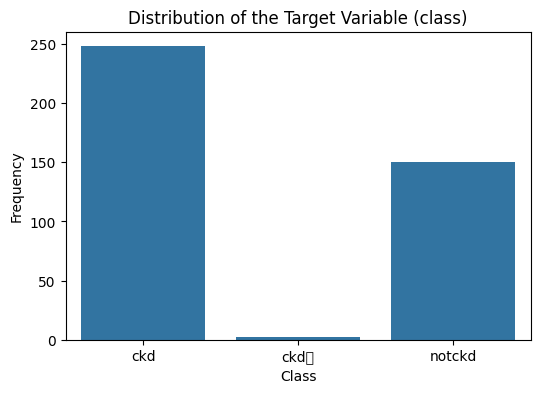

/tmp/ipython-input-1342554636.py:28: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


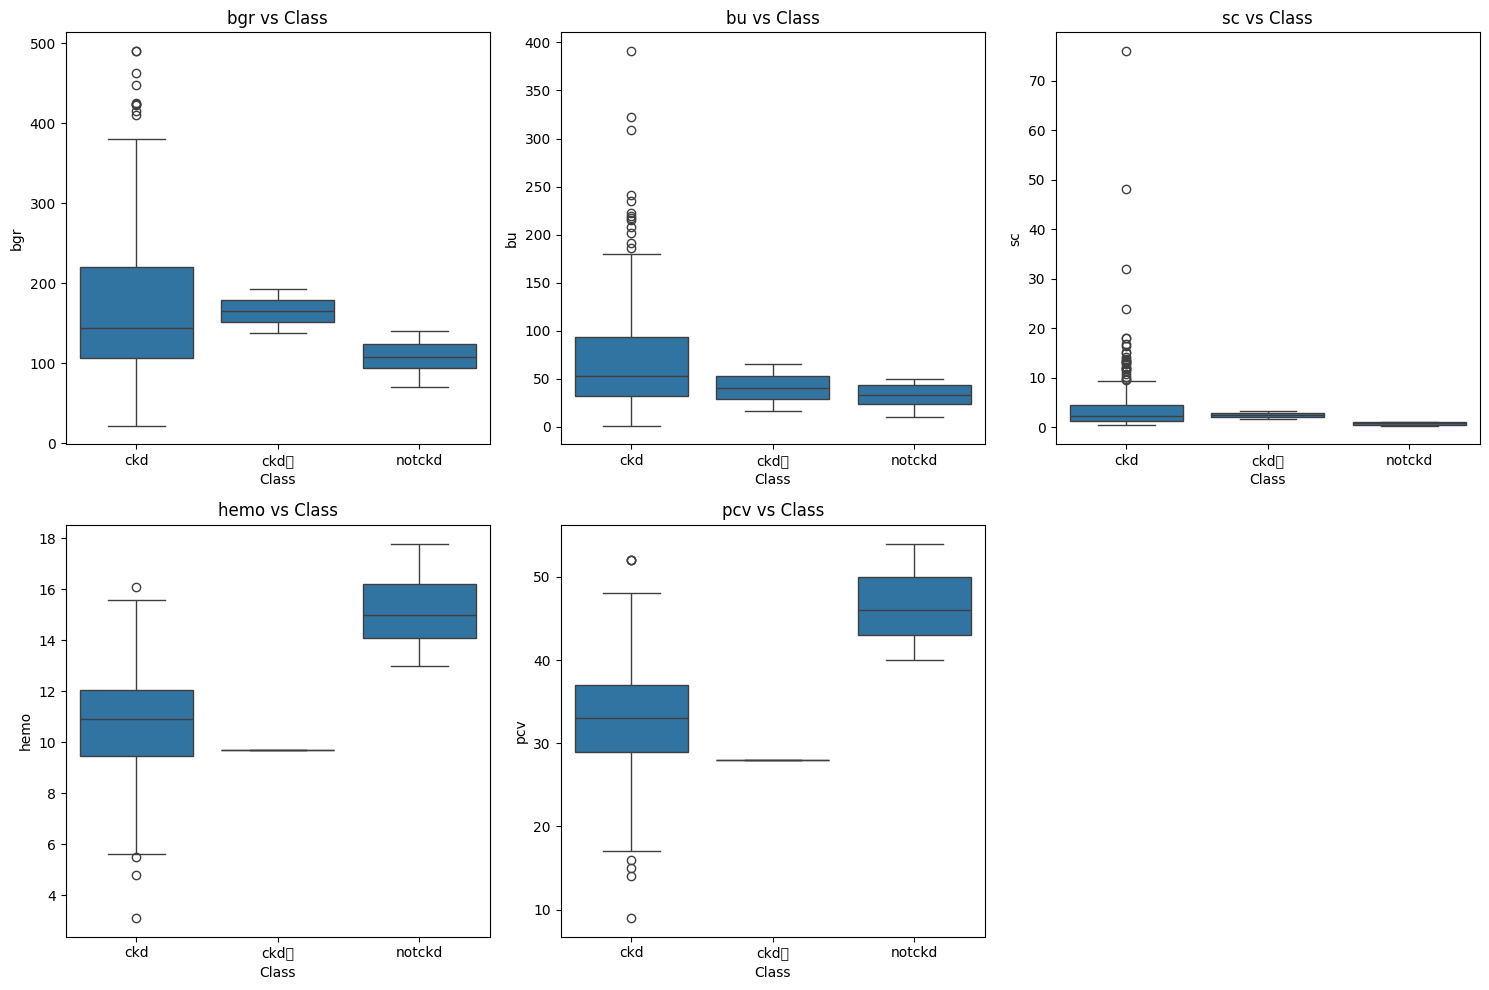

/tmp/ipython-input-1342554636.py:41: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


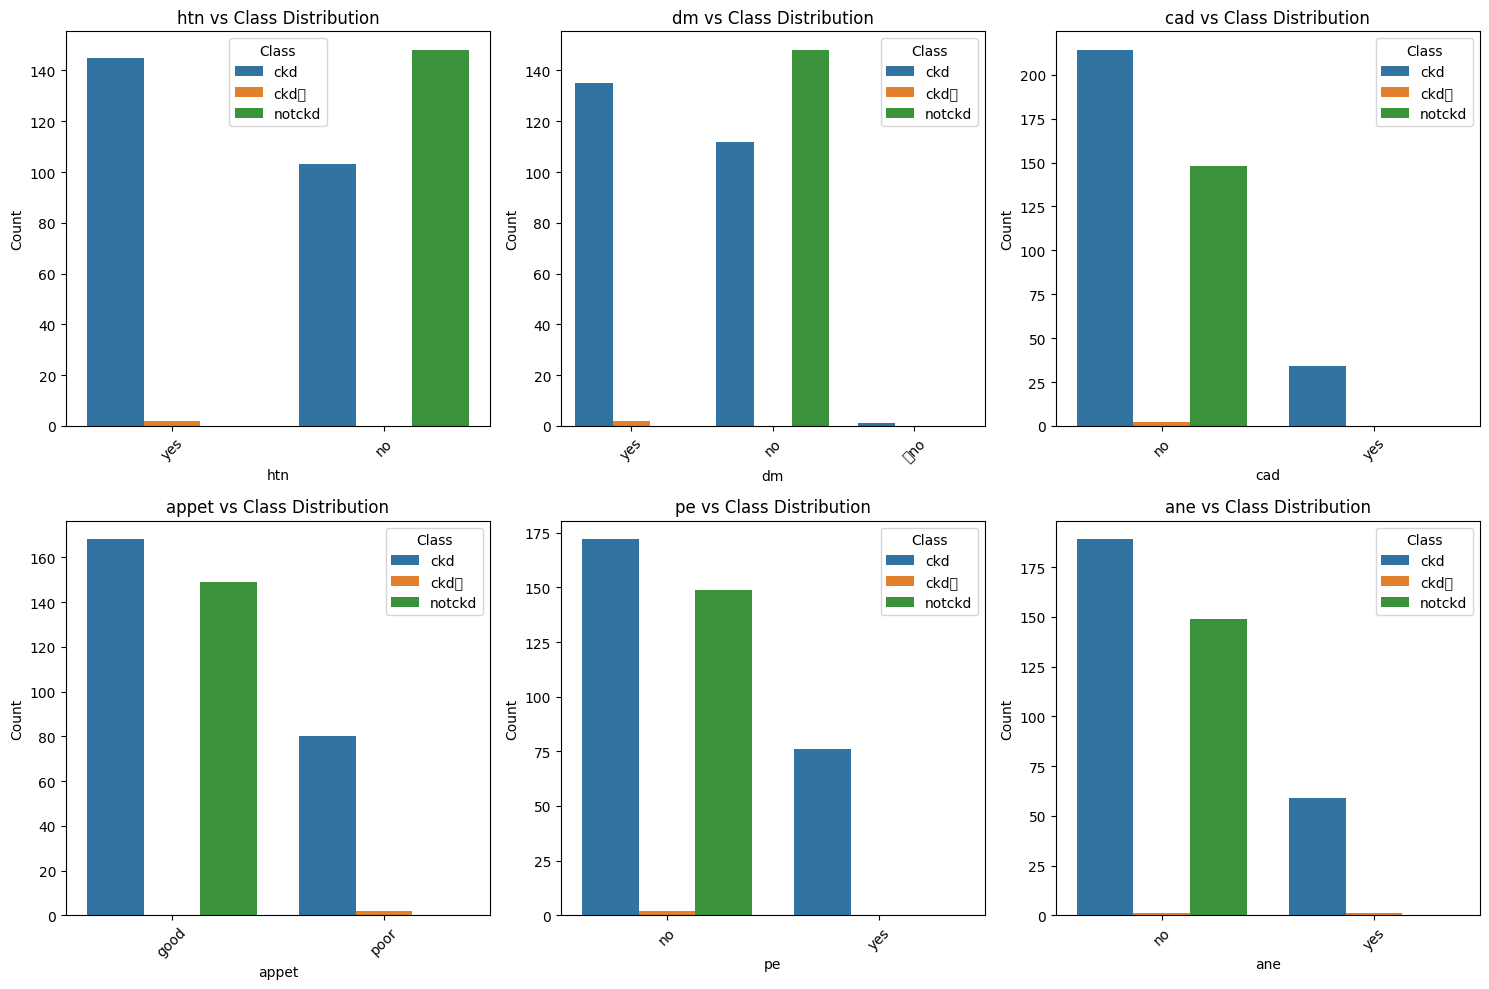

In [11]:
# Step 1: Calculate and display the frequency distribution of the 'class' column
display("Frequency distribution of the 'class' column:")
display(df_ckd['class'].value_counts())

# Step 2: Create a count plot to visualize the distribution of the 'class' column
plt.figure(figsize=(6, 4))
sns.countplot(x=df_ckd['class'].dropna())
plt.title('Distribution of the Target Variable (class)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Step 3: Select a few features that might have a strong relationship with 'class'
# Based on previous EDA and domain knowledge, features related to kidney function and related conditions are good candidates.
# Numerical: 'bgr', 'bu', 'sc', 'hemo', 'pcv'
# Categorical: 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'
selected_numerical_features = ['bgr', 'bu', 'sc', 'hemo', 'pcv']
selected_categorical_features = ['htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Step 4: Create box plots for selected numerical features vs 'class'
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='class', y=col, data=df_ckd)
    plt.title(f'{col} vs Class')
    plt.xlabel('Class')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Step 5: Create grouped bar plots for selected categorical features vs 'class'
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, hue='class', data=df_ckd.dropna(subset=[col, 'class']))
    plt.title(f'{col} vs Class Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Class')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous output shows a minor issue with the target variable 'class' having an extra value 'ckd\t'. This needs to be cleaned before concluding the analysis of the target variable distribution and its relationship with other features.



"Frequency distribution of the cleaned 'class' column:"

,count
class,
ckd,250
notckd,150


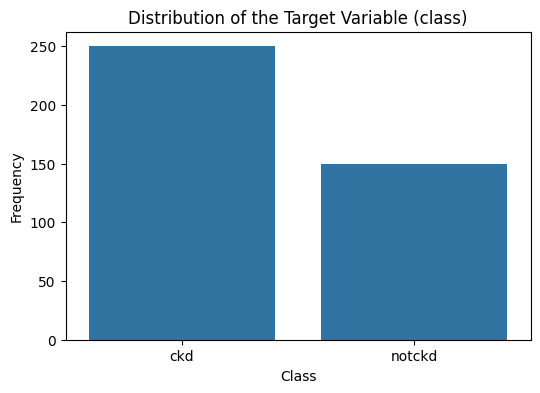

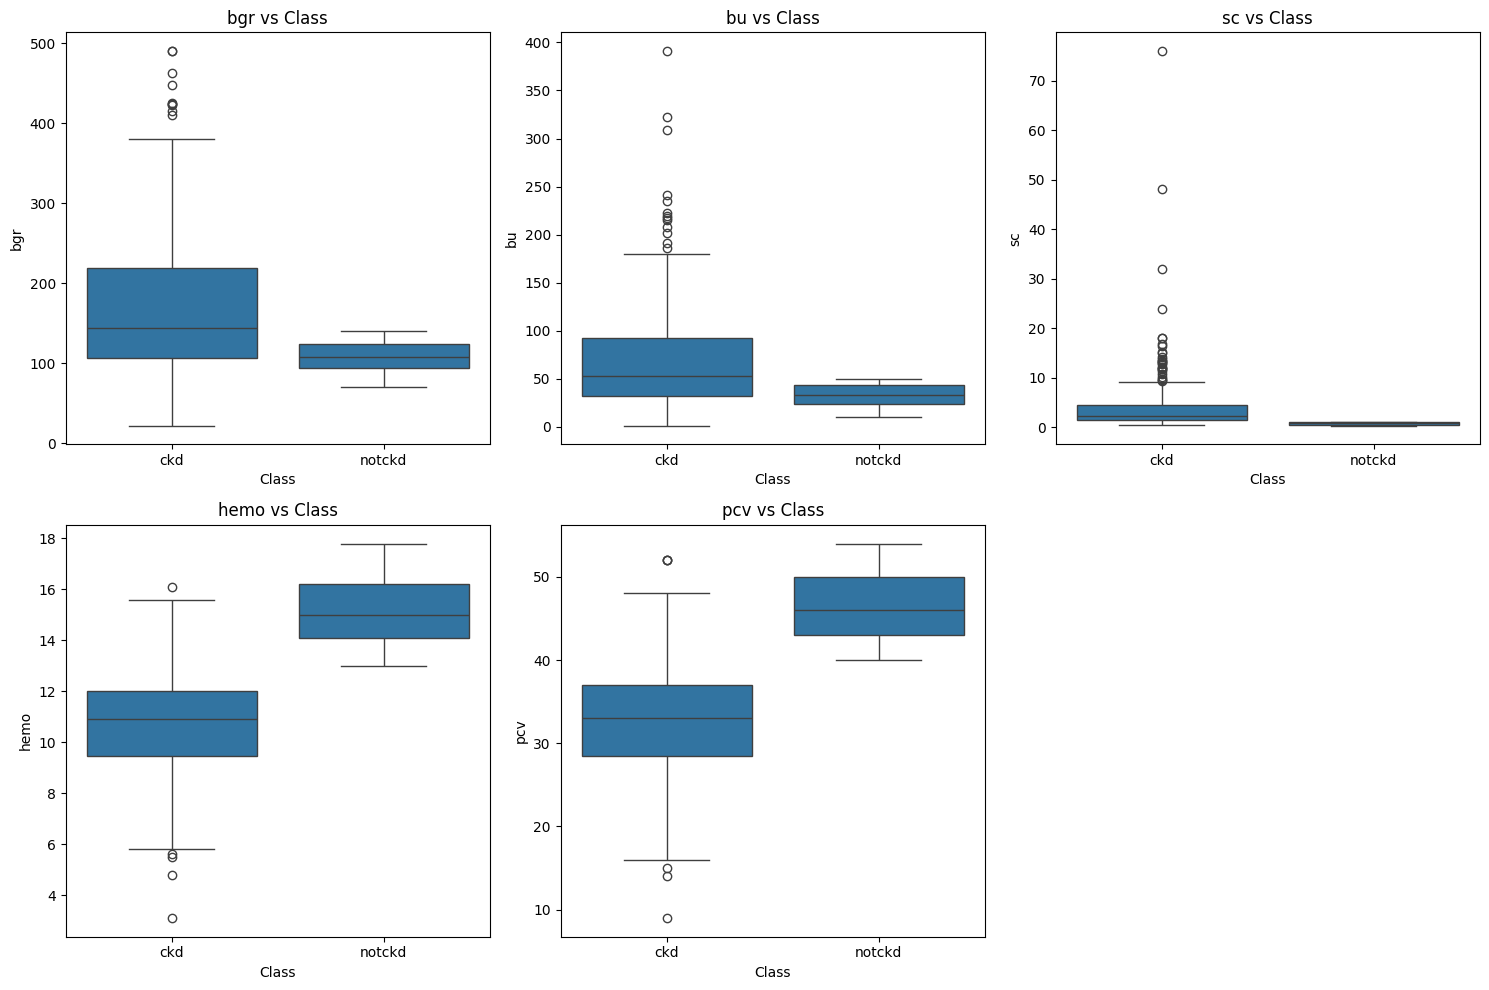

/tmp/ipython-input-8006923.py:39: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


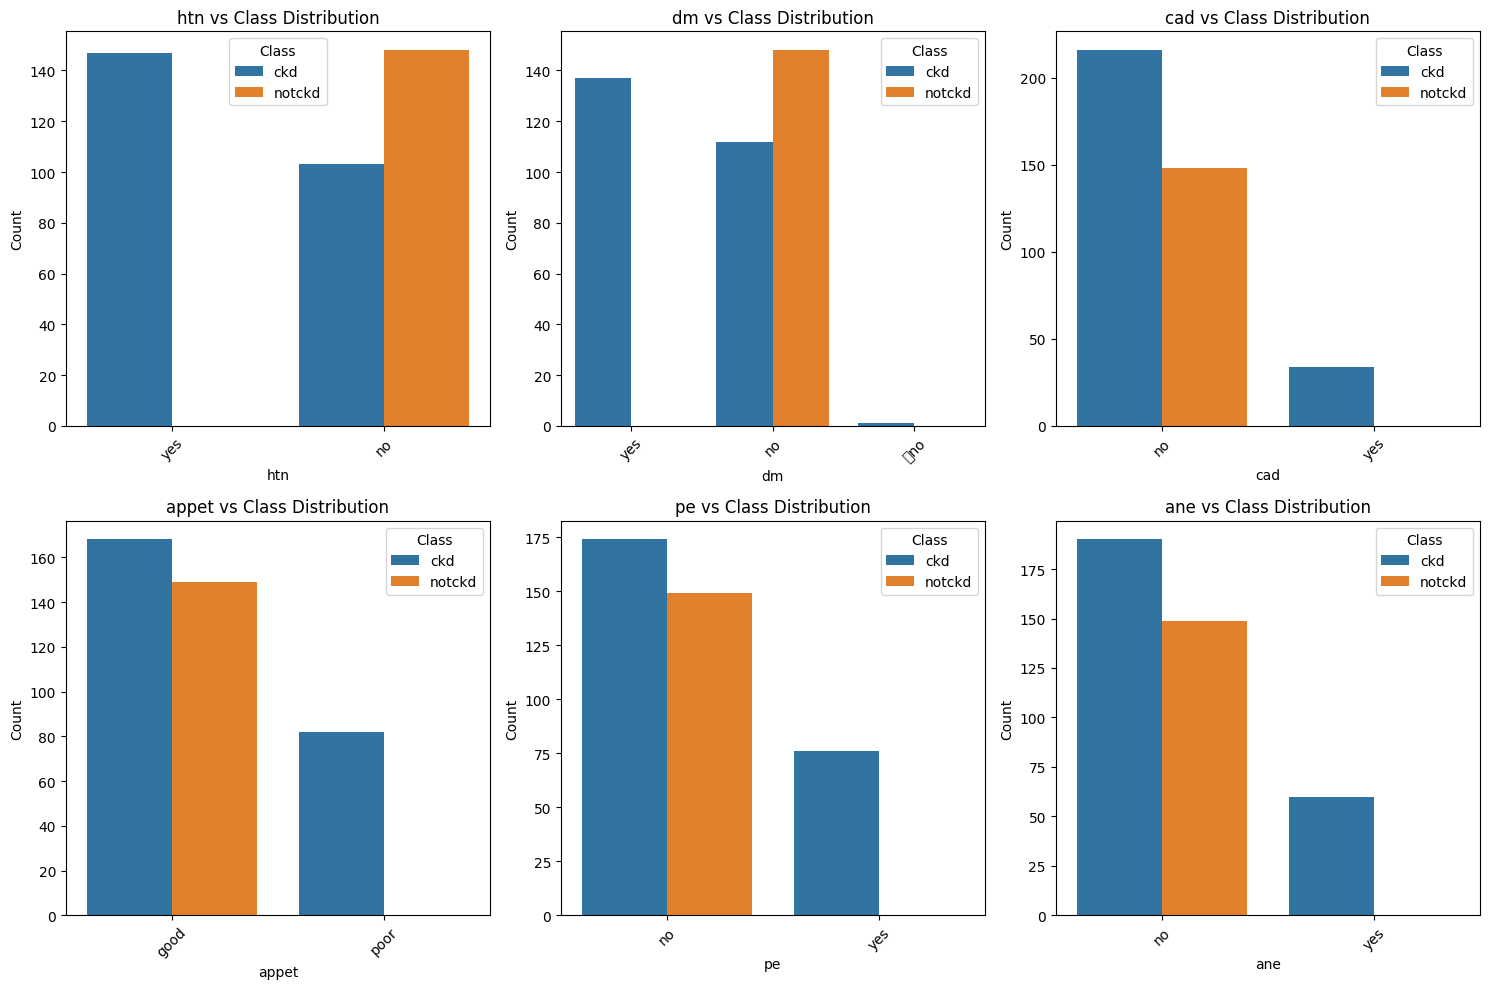

In [12]:
# Clean the 'class' column by replacing 'ckd\t' with 'ckd'
df_ckd['class'] = df_ckd['class'].replace('ckd\t', 'ckd')

# Re-calculate and display the frequency distribution of the cleaned 'class' column
display("Frequency distribution of the cleaned 'class' column:")
display(df_ckd['class'].value_counts())

# Re-create the count plot to visualize the distribution of the cleaned 'class' column
plt.figure(figsize=(6, 4))
sns.countplot(x=df_ckd['class'].dropna())
plt.title('Distribution of the Target Variable (class)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Re-create box plots for selected numerical features vs cleaned 'class'
selected_numerical_features = ['bgr', 'bu', 'sc', 'hemo', 'pcv']
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='class', y=col, data=df_ckd)
    plt.title(f'{col} vs Class')
    plt.xlabel('Class')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Re-create grouped bar plots for selected categorical features vs cleaned 'class'
selected_categorical_features = ['htn', 'dm', 'cad', 'appet', 'pe', 'ane']
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, hue='class', data=df_ckd.dropna(subset=[col, 'class']))
    plt.title(f'{col} vs Class Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Class')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 400 entries with several columns having a significant number of missing values, particularly `rbc`, `rbcc`, `wbcc`, `pot`, and `sod`.
*   Numerical columns like `age`, `bp`, `bgr`, `bu`, `sc`, `sod`, `pot`, `hemo`, `pcv`, `wbcc`, and `rbcc` exhibit varying distributions and ranges.
*   Categorical columns such as `htn`, `dm`, `cad`, `appet`, `pe`, and `ane` show imbalances in the distribution of their categories.
*   Visualizations indicate potential relationships between certain numerical features (e.g., `bgr` vs `bu`, `hemo` vs `pcv`, and `sc` vs `bu`).
*   The target variable `class` is imbalanced, with 250 instances of 'ckd' and 150 instances of 'notckd'.
*   Several numerical features (`bgr`, `bu`, `sc`, `hemo`, `pcv`) show distinct distributions between the 'ckd' and 'notckd' classes, suggesting they are strong indicators of kidney disease.
*   Categorical features like `htn`, `dm`, `pe`, `ane`, and 'poor' `appet` are strongly associated with the 'ckd' class.

### Insights or Next Steps

*   The significant amount of missing data needs to be addressed through appropriate imputation techniques or column removal before modeling.
*   The observed imbalance in the target variable suggests that techniques like oversampling or undersampling might be necessary during model training to prevent bias.


## Data Preprocessing

Based on the EDA, we need to handle missing values, encode categorical features, and scale numerical features. We'll also prepare the data for potential SMOTE application later.

### Handle Missing Values

We'll start by imputing missing numerical values with the median and missing categorical values with the mode.

In [13]:
# Impute missing numerical values with the median
for col in df_ckd.select_dtypes(include=np.number).columns:
    df_ckd[col].fillna(df_ckd[col].median(), inplace=True)

# Impute missing categorical values with the mode
for col in df_ckd.select_dtypes(include='object').columns:
    # Handle potential multiple modes by taking the first one
    mode_value = df_ckd[col].mode()[0]
    df_ckd[col].fillna(mode_value, inplace=True)

display("DataFrame after imputing missing values:")
display(df_ckd.isnull().sum())

/tmp/ipython-input-2185656847.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ckd[col].fillna(df_ckd[col].median(), inplace=True)
/tmp/ipython-input-2185656847.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

'DataFrame after imputing missing values:'

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


### Encode Categorical Features

We'll use one-hot encoding for the categorical features.

In [14]:
# Identify categorical columns excluding the target variable 'class'
categorical_cols = df_ckd.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('class')

# Apply one-hot encoding
df_ckd_encoded = pd.get_dummies(df_ckd, columns=categorical_cols, drop_first=True)

display("DataFrame after one-hot encoding:")
display(df_ckd_encoded.head())

'DataFrame after one-hot encoding:'

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,True,False,False,True,False,True,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,True,False,False,False,True,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,True,False,False,False,False,True,False,True,False,True
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,False,True,False,True,True,False,False,True,True,True
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,True,False,False,False,True,False,False,False,False,False


### Scale Numerical Features

We'll use StandardScaler to scale the numerical features.

In [15]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = df_ckd_encoded.select_dtypes(include=np.number).columns

# Apply StandardScaler
scaler = StandardScaler()
df_ckd_encoded[numerical_cols] = scaler.fit_transform(df_ckd_encoded[numerical_cols])

display("DataFrame after scaling numerical features:")
display(df_ckd_encoded.head())

'DataFrame after scaling numerical features:'

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,-0.210031,0.254214,0.421486,0.076249,-0.380269,-0.320122,-0.419451,-0.319668,0.040104,-0.062903,...,True,False,False,True,False,True,False,False,False,False
1,-2.627234,-1.972476,0.421486,2.363728,-0.380269,-0.320122,-0.784315,-0.390819,0.040104,-0.062903,...,True,False,False,False,True,False,False,False,False,False
2,0.615355,0.254214,-1.421074,0.838742,2.507853,3.697618,-0.074858,-0.212942,0.040104,-0.062903,...,True,False,False,False,False,True,False,True,False,True
3,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,-0.373337,-0.014047,0.142813,-2.896333,-0.737181,...,False,True,False,True,True,False,False,True,True,True
4,-0.033163,0.254214,-1.421074,0.838742,-0.380269,-0.519679,-0.622154,-0.284093,0.040104,-0.062903,...,True,False,False,False,True,False,False,False,False,False


## Feature Selection/Engineering

For this step, we will proceed without explicit feature selection or engineering for the initial presentation, using all available features after preprocessing. However, in a real-world scenario, you might use techniques like feature importance from tree-based models or domain knowledge to select features.

## Split Data

Now, we will split the data into training and testing sets.

In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_ckd_encoded.drop('class', axis=1)
y = df_ckd_encoded['class']

# Convert target variable to numerical if it's not already
# This is often required for models and SMOTE
y = y.map({'ckd': 1, 'notckd': 0})


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display("Shape of training data (X_train, y_train):")
display(X_train.shape, y_train.shape)
display("Shape of testing data (X_test, y_test):")
display(X_test.shape, y_test.shape)

'Shape of training data (X_train, y_train):'

(320, 25)

(320,)

'Shape of testing data (X_test, y_test):'

(80, 25)

(80,)

## Applying SMOTE

Finally, here is the code to apply SMOTE to the training data. This should be done *after* splitting.

In [18]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

display("Shape of training data after SMOTE (X_train_resampled, y_train_resampled):")
display(X_train_resampled.shape, y_train_resampled.shape)

# Combine the resampled features and target into a DataFrame
df_train_resampled = pd.concat([X_train_resampled, y_train_resampled.rename('class')], axis=1)

# Save the resampled training data to a CSV file
df_train_resampled.to_csv('ckd_train_resampled.csv', index=False)

print("\nResampled training dataset saved as ckd_train_resampled.csv")

'Shape of training data after SMOTE (X_train_resampled, y_train_resampled):'

(400, 25)

(400,)


Resampled training dataset saved as ckd_train_resampled.csv
